In [219]:
# Ï¥àÍ∏∞ ÏÑ§Ï†ï
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import os

In [220]:
# drive Ïó∞Í≤∞
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
# ÌïúÍ∏Ä ÏÑ§Ïπò
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
import matplotlib.font_manager as fm
font10 = fm.FontProperties(fname=path, size=10)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [222]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

In [223]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏßÄÏ†ï
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

In [224]:
# csv Ìï¥Îãπ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
train_path = '/content/drive/MyDrive/card_train.csv'
test_path = '/content/drive/MyDrive/card_test.csv'

In [226]:
# train_df
train_df = pd.read_csv(train_path, encoding = 'utf-8-sig')

In [ ]:
# Ïó¥, Ìñâ Ï∂îÏ∂ú
train_df.shape

(70560, 738)

In [ ]:
# train_df Ï∞®Ìä∏ ÎìúÎü¨ÎÇ¥Í∏∞
train_df.head()

Unnamed: 0.1  ÎåÄÌëúÍ≤∞Ï†úÏùº ÎåÄÌëúÍ≤∞Ï†úÎ∞©Î≤ïÏΩîÎìú ÎåÄÌëúÏ≤≠Íµ¨ÏßÄÍ≥†Í∞ùÏ£ºÏÜåÍµ¨Î∂ÑÏΩîÎìú ÎåÄÌëúÏ≤≠Íµ¨ÏÑúÏàòÎ†πÏßÄÍµ¨Î∂ÑÏΩîÎìú Ï≤≠Íµ¨ÏÑúÏàòÎ†πÎ∞©Î≤ï  \
0         61865      1     ÏûêÎèôÏù¥Ï≤¥           Ï£ºÍ±∞ÏßÄ           Ïö∞Ìé∏      Ïö∞Ìé∏   
1          8547     13     ÏûêÎèôÏù¥Ï≤¥           ÎØ∏ÌôïÏù∏          Ïù¥Î©îÏùº     Ïù¥Î©îÏùº   
2         43497     25     ÏûêÎèôÏù¥Ï≤¥           Ï£ºÍ±∞ÏßÄ           Ïö∞Ìé∏      Ïö∞Ìé∏   
3         40785     25     ÏûêÎèôÏù¥Ï≤¥           Ï£ºÍ±∞ÏßÄ           Ïö∞Ìé∏      Ïö∞Ìé∏   
4         18999     25     ÏûêÎèôÏù¥Ï≤¥           Ï£ºÍ±∞ÏßÄ           Ïö∞Ìé∏      Ïö∞Ìé∏   

   Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_B0  Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R3M  Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R6M  Ï≤≠Íµ¨Í∏àÏï°_B0  ...  Ïª®ÌÉùÍ±¥Ïàò_CA_Ï≤≠Íµ¨ÏÑú_R6M  \
0           1            1            1      466  ...                0   
1           1            1            1     2417  ...                0   
2           0            0            0        0  ...                2   
3           1            1            1     5931  ...                0   
4           1            1            1      684  ...                2   

   Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_Ï≤≠Íµ¨ÏÑú_R6M  Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_Ïù∏ÌÑ∞ÎÑ∑_R6M  Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_ÎãπÏÇ¨Ïï±_R6M  Ïª®ÌÉùÍ±¥Ïàò_Ï±ÑÍ∂å_B0M  \
0                  5                  5                  0            0   
1                  4                  6                  0            0   
2                  4                  2                  0            0   
3                  0                  0                  0            0   
4                  0                  0                  0            0   

   Ïª®ÌÉùÍ±¥Ïàò_Ï±ÑÍ∂å_R6M  Ï∫†ÌéòÏù∏Ï†ëÏ¥âÍ±¥Ïàò_R12M  Ï∫†ÌéòÏù∏Ï†ëÏ¥âÏùºÏàò_R12M            ID  Segment.1  
0            0         1Ìöå Ïù¥ÏÉÅ         1Ïùº Ïù¥ÏÉÅ  TRAIN_000389          E  
1            0         1Ìöå Ïù¥ÏÉÅ         1Ïùº Ïù¥ÏÉÅ  TRAIN_304152          D  
2            0         5Ìöå Ïù¥ÏÉÅ         5Ïùº Ïù¥ÏÉÅ  TRAIN_356239          E  
3            0         1Ìöå Ïù¥ÏÉÅ         1Ïùº Ïù¥ÏÉÅ  TRAIN_122432          E  
4            0        10Ìöå Ïù¥ÏÉÅ        10Ïùº Ïù¥ÏÉÅ  TRAIN_285200          E  

[5 rows x 738 columns]

In [ ]:
# Ïó¥Îßå Ï∂îÏ∂ú
for i in train_df.columns:
  print(i)

Unnamed: 0.1
ÎåÄÌëúÍ≤∞Ï†úÏùº
ÎåÄÌëúÍ≤∞Ï†úÎ∞©Î≤ïÏΩîÎìú
ÎåÄÌëúÏ≤≠Íµ¨ÏßÄÍ≥†Í∞ùÏ£ºÏÜåÍµ¨Î∂ÑÏΩîÎìú
ÎåÄÌëúÏ≤≠Íµ¨ÏÑúÏàòÎ†πÏßÄÍµ¨Î∂ÑÏΩîÎìú
Ï≤≠Íµ¨ÏÑúÏàòÎ†πÎ∞©Î≤ï
Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_B0
Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R3M
Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R6M
Ï≤≠Íµ¨Í∏àÏï°_B0
Ï≤≠Íµ¨Í∏àÏï°_R3M
Ï≤≠Íµ¨Í∏àÏï°_R6M
Ìè¨Ïù∏Ìä∏_ÎßàÏùºÎ¶¨ÏßÄ_Í±¥Î≥Ñ_B0M
Ìè¨Ïù∏Ìä∏_ÎßàÏùºÎ¶¨ÏßÄ_Í±¥Î≥Ñ_R3M
Ìè¨Ïù∏Ìä∏_Ìè¨Ïù∏Ìä∏_Í±¥Î≥Ñ_B0M
Ìè¨Ïù∏Ìä∏_Ìè¨Ïù∏Ìä∏_Í±¥Î≥Ñ_R3M
Ìè¨Ïù∏Ìä∏_ÎßàÏùºÎ¶¨ÏßÄ_ÏõîÏ†ÅÎ¶Ω_B0M
Ìè¨Ïù∏Ìä∏_ÎßàÏùºÎ¶¨ÏßÄ_ÏõîÏ†ÅÎ¶Ω_R3M
Ìè¨Ïù∏Ìä∏_Ìè¨Ïù∏Ìä∏_ÏõîÏ†ÅÎ¶Ω_B0M
Ìè¨Ïù∏Ìä∏_Ìè¨Ïù∏Ìä∏_ÏõîÏ†ÅÎ¶Ω_R3M
Ìè¨Ïù∏Ìä∏_Ï†ÅÎ¶ΩÌè¨Ïù∏Ìä∏_R12M
Ìè¨Ïù∏Ìä∏_Ï†ÅÎ¶ΩÌè¨Ïù∏Ìä∏_R3M
Ìè¨Ïù∏Ìä∏_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R12M
Ìè¨Ïù∏Ìä∏_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R3M
Ìè¨Ïù∏Ìä∏_ÏûîÏó¨Ìè¨Ïù∏Ìä∏_B0M
ÎßàÏùº_Ï†ÅÎ¶ΩÌè¨Ïù∏Ìä∏_R12M
ÎßàÏùº_Ï†ÅÎ¶ΩÌè¨Ïù∏Ìä∏_R3M
ÎßàÏùº_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R12M
ÎßàÏùº_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R3M
ÎßàÏùº_ÏûîÏó¨Ìè¨Ïù∏Ìä∏_B0M
Ìï†Ïù∏Í±¥Ïàò_R3M
Ìï†Ïù∏Í∏àÏï°_R3M
Ìï†Ïù∏Í±¥Ïàò_B0M
Ìï†Ïù∏Í∏àÏï°_B0M
Ìï†Ïù∏Í∏àÏï°_Ï≤≠Íµ¨ÏÑú_R3M
Ìï†Ïù∏Í∏àÏï°_Ï≤≠Íµ¨ÏÑú_B0M
ÏÉÅÌôòÍ∞úÏõîÏàò_Í≤∞Ï†úÏùº_R6M
ÏÉÅÌôòÍ

In [ ]:
# keywords Ï∂îÏ∂ú -> Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäî keyword Îßå Îî∞Î°ú Ï∂îÏ∂ú
usage_keywords = ["Í∏àÏï°", "Ïπ¥ÎìúÏàò", "Ïù¥Ïö©", "Ïó∞ÌöåÎπÑ", "ÏùºÏãúÎ∂à"]
risk_keywords = ["ÌïúÎèÑ", "Ï±ÑÍ∂å", "Ïó∞Ï≤¥", "Ï±ÑÎ¨¥", "RP"]
marketing_keywords = ["Ïª®ÌÉù", "Ï∫†ÌéòÏù∏", "Ïù¥Ïö©Ïú†ÎèÑ"]
prediction_keywords = ["ÌÉàÌöå", "Î∂àÎßåÏ†úÍ∏∞", "Í≤ΩÍ≥º", "Ï≤≠Íµ¨"]

all_keywords = usage_keywords + risk_keywords + marketing_keywords + prediction_keywords

matched_columns = []
for col in train_df.columns:
    for keyword in all_keywords:
        if keyword in col:
            matched_columns.append(col)
            break

print(matched_columns)

['ÎåÄÌëúÏ≤≠Íµ¨ÏßÄÍ≥†Í∞ùÏ£ºÏÜåÍµ¨Î∂ÑÏΩîÎìú', 'ÎåÄÌëúÏ≤≠Íµ¨ÏÑúÏàòÎ†πÏßÄÍµ¨Î∂ÑÏΩîÎìú', 'Ï≤≠Íµ¨ÏÑúÏàòÎ†πÎ∞©Î≤ï', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_B0', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R3M', 'Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R6M', 'Ï≤≠Íµ¨Í∏àÏï°_B0', 'Ï≤≠Íµ¨Í∏àÏï°_R3M', 'Ï≤≠Íµ¨Í∏àÏï°_R6M', 'Ìè¨Ïù∏Ìä∏_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R12M', 'Ìè¨Ïù∏Ìä∏_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R3M', 'ÎßàÏùº_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R12M', 'ÎßàÏùº_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R3M', 'Ìï†Ïù∏Í∏àÏï°_R3M', 'Ìï†Ïù∏Í∏àÏï°_B0M', 'Ìï†Ïù∏Í∏àÏï°_Ï≤≠Íµ¨ÏÑú_R3M', 'Ìï†Ïù∏Í∏àÏï°_Ï≤≠Íµ¨ÏÑú_B0M', 'Ïó∞Ï≤¥Í±¥Ïàò_R6M', 'Ïó∞Ï≤¥Í±¥Ïàò_R3M', 'ÌòúÌÉùÏàòÌòúÍ∏àÏï°_R3M', 'ÌòúÌÉùÏàòÌòúÍ∏àÏï°', 'ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°', 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°', 'CAÌïúÎèÑÍ∏àÏï°', 'ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°', 'ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°', 'RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ', 'RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®', 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M', 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M', 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî', 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M', 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M', 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî', 'ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M', 'ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R

In [ ]:
# Ï†ïÎ¶¨Îêú ÎÇ¥Ïö© CSVÌååÏùºÎ°ú Ï†ÄÏû•
# (utf-8-sigÎ°ú Ïù∏ÏΩîÎî©) -> ÌïúÍµ≠Ïñ¥ Íπ®Ïßê Î∞©ÏßÄ
matched_df = train_df[matched_columns]
matched_df.to_csv("matched_columns_output1.csv", index=False, encoding='utf-8-sig')

In [ ]:
# Ï†ïÎèàÎêú csv Î∂àÎü¨Ïò§Í∏∞
matched = '/content/matched_columns_output1.csv'

In [ ]:
matched_columns_output1 = pd.read_csv(matched)

In [ ]:
# Ï†ïÎèàÎêú Ìñâ, Ïó¥ Ï∂îÏ∂ú
matched_columns_output1.shape

(70560, 532)

In [ ]:
matched_columns_output1.head()

ÎåÄÌëúÏ≤≠Íµ¨ÏßÄÍ≥†Í∞ùÏ£ºÏÜåÍµ¨Î∂ÑÏΩîÎìú ÎåÄÌëúÏ≤≠Íµ¨ÏÑúÏàòÎ†πÏßÄÍµ¨Î∂ÑÏΩîÎìú Ï≤≠Íµ¨ÏÑúÏàòÎ†πÎ∞©Î≤ï  Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_B0  Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R3M  Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R6M  \
0           Ï£ºÍ±∞ÏßÄ           Ïö∞Ìé∏      Ïö∞Ìé∏           1            1            1   
1           ÎØ∏ÌôïÏù∏          Ïù¥Î©îÏùº     Ïù¥Î©îÏùº           1            1            1   
2           Ï£ºÍ±∞ÏßÄ           Ïö∞Ìé∏      Ïö∞Ìé∏           0            0            0   
3           Ï£ºÍ±∞ÏßÄ           Ïö∞Ìé∏      Ïö∞Ìé∏           1            1            1   
4           Ï£ºÍ±∞ÏßÄ           Ïö∞Ìé∏      Ïö∞Ìé∏           1            1            1   

   Ï≤≠Íµ¨Í∏àÏï°_B0  Ï≤≠Íµ¨Í∏àÏï°_R3M  Ï≤≠Íµ¨Í∏àÏï°_R6M  Ìè¨Ïù∏Ìä∏_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R12M  ...  Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_EM_R6M  \
0      466      1678      3462               0  ...                 0   
1     2417      7778     16768               0  ...                56   
2        0         0       254               0  ...                 1   
3     5931     15957     34480            9051  ...                13   
4      684      2661      5642               0  ...                 0   

   Ïª®ÌÉùÍ±¥Ïàò_Ïπ¥ÎìúÎ°†_Ï≤≠Íµ¨ÏÑú_R6M  Ïª®ÌÉùÍ±¥Ïàò_CA_Ï≤≠Íµ¨ÏÑú_R6M  Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_Ï≤≠Íµ¨ÏÑú_R6M  Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_Ïù∏ÌÑ∞ÎÑ∑_R6M  \
0                 0                0                  5                  5   
1                 0                0                  4                  6   
2                 0                2                  4                  2   
3                 0                0                  0                  0   
4                 0                2                  0                  0   

   Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_ÎãπÏÇ¨Ïï±_R6M  Ïª®ÌÉùÍ±¥Ïàò_Ï±ÑÍ∂å_B0M  Ïª®ÌÉùÍ±¥Ïàò_Ï±ÑÍ∂å_R6M  Ï∫†ÌéòÏù∏Ï†ëÏ¥âÍ±¥Ïàò_R12M  Ï∫†ÌéòÏù∏Ï†ëÏ¥âÏùºÏàò_R12M  
0                  0            0            0         1Ìöå Ïù¥ÏÉÅ         1Ïùº Ïù¥ÏÉÅ  
1                  0            0            0         1Ìöå Ïù¥ÏÉÅ         1Ïùº Ïù¥ÏÉÅ  
2                  0            0            0         5Ìöå Ïù¥ÏÉÅ         5Ïùº Ïù¥ÏÉÅ  
3                  0            0            0         1Ìöå Ïù¥ÏÉÅ         1Ïùº Ïù¥ÏÉÅ  
4                  0            0            0        10Ìöå Ïù¥ÏÉÅ        10Ïùº Ïù¥ÏÉÅ  

[5 rows x 532 columns]

In [ ]:
# Îã§Ïö¥Î°úÎìú
from google.colab import files
files.download("matched_columns_output1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load dataset - Ï§ëÏöîÎèÑ
train_df = pd.read_csv('/content/matched_columns_output1.csv', encoding='utf-8-sig')

# ÌÉÄÍ≤ü Î∂àÎü¨Ïò§Í∏∞
y = pd.read_csv('/content/drive/MyDrive/card_train.csv', encoding='utf-8-sig')["Segment"]

In [ ]:
def select_features_by_keywords(df, keywords):
    return df[[col for col in df.columns if any(k in col for k in keywords)]]

In [ ]:
def train_model_with_keywords(X, y):
    X = X.fillna("missing")
    for col in X.select_dtypes(include="object").columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return model, score

In [ ]:
# Î™®Îç∏ ÌõàÎ†®
def train_model_with_keywords(X, y):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import f1_score
    from lightgbm import LGBMClassifier

    X = X.fillna("missing")
    for col in X.select_dtypes(include="object").columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return model, score

In [ ]:
# Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî Ìï®
def plot_feature_importance(model, feature_names, top_n=30):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]
    plt.figure(figsize=(8, 10))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
    plt.title("Top Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.209304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 53589
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 387
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


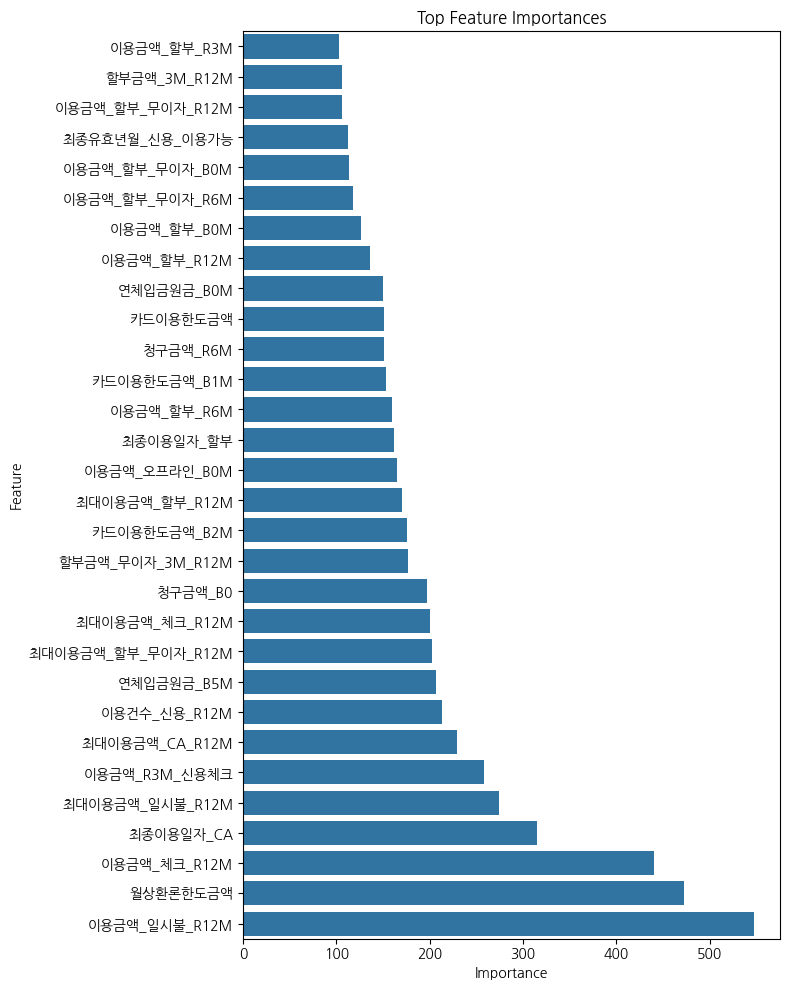

In [ ]:
# Ïã§Ìóò: ÌÇ§ÏõåÎìúÎßå Î∞îÍøîÍ∞ÄÎ©∞ Î∞òÎ≥µ
keywords = ["Ïù¥Ïö©", "Í∏àÏï°", "Ïó∞Ï≤¥"]
X_selected = select_features_by_keywords(train_df, keywords)
model, score = train_model_with_keywords(X_selected, y)

print(f"Macro F1 score: {score:.4f}")
plot_feature_importance(model, X_selected.columns)

In [ ]:
# ÏÉÅÏúÑ ÏßëÎã® ÌÇ§ÏõåÎìú ÏÑ§Ï†ï (8Í∞ú)
# ÏûÑÏùò ÏßÄÏ†ïÌïú Í≤É.
top_8_keywords = ["ÏùºÏãúÎ∂à", "Í∏àÏï°", "Ïπ¥Îìú", "Ïó∞Ï≤¥", "Í≤ΩÍ≥º", "ÌïúÎèÑ", "Ï¶ùÍ∞êÏú®", "Ïù¥Ïö©Ïú†ÎèÑ"]
keywords = ["Ï≤≠Íµ¨","Ïù¥Ïö©Í∏àÏï°","ÌèâÏûî","RP","ÏûîÏï°","Ïù¥Ïö©Í±¥Ïàò","Ìè¨Ïù∏Ìä∏","Ïª®ÌÉù","Í∏àÏï°"]

In [ ]:
# Ï§ëÎ≥µ Ï†úÍ±∞Ìï¥ÏÑú Ìï©ÏπòÍ∏∞
combined_keywords = list(set(top_8_keywords + keywords))

# Î∞òÎìúÏãú Ìè¨Ìï®Ìï† ÌÇ§ÏõåÎìú Î≥ÑÎèÑ Ï†ïÏùò
must_include_keywords = ["Ïó∞Ï≤¥", "ÌÉàÌöå"]

In [ ]:
for kw in top_8_keywords:
    cols = [c for c in train_df.columns if kw in c]
    print(f"{kw} ÌÇ§ÏõåÎìú Ïª¨Îüº Í∞úÏàò: {len(cols)}")

ÏùºÏãúÎ∂à ÌÇ§ÏõåÎìú Ïª¨Îüº Í∞úÏàò: 40
Í∏àÏï° ÌÇ§ÏõåÎìú Ïª¨Îüº Í∞úÏàò: 178
Ïπ¥Îìú ÌÇ§ÏõåÎìú Ïª¨Îüº Í∞úÏàò: 60
Ïó∞Ï≤¥ ÌÇ§ÏõåÎìú Ïª¨Îüº Í∞úÏàò: 29
Í≤ΩÍ≥º ÌÇ§ÏõåÎìú Ïª¨Îüº Í∞úÏàò: 38
ÌïúÎèÑ ÌÇ§ÏõåÎìú Ïª¨Îüº Í∞úÏàò: 36
Ï¶ùÍ∞êÏú® ÌÇ§ÏõåÎìú Ïª¨Îüº Í∞úÏàò: 28
Ïù¥Ïö©Ïú†ÎèÑ ÌÇ§ÏõåÎìú Ïª¨Îüº Í∞úÏàò: 11


In [ ]:
# ÌÇ§ÏõåÎìú Í∏∞Î∞ò ÌîºÏ≤ò ÏÑ†ÌÉù Ìï®
def select_features_by_keywords(df, keywords):
    return df[[col for col in df.columns if any(k in col for k in keywords)]]

In [ ]:
# must_include Ïª¨Îüº Í∞ïÏ†ú Ìè¨Ìï®
X_selected = select_features_by_keywords(train_df, combined_keywords)
must_include_cols = [col for col in train_df.columns if any(k in col for k in must_include_keywords)]

In [ ]:
# must_include_cols Ï§ë Ïù¥ÎØ∏ X_selectedÏóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ Ïª¨ÎüºÏùÑ Ï∂îÍ∞Ä
additional_cols = [col for col in must_include_cols if col not in X_selected.columns]
X_selected = pd.concat([X_selected, train_df[additional_cols]], axis=1)

In [ ]:
# Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò
def train_model_with_keywords(X, y):
    X = X.fillna("missing")
    for col in X.select_dtypes(include="object").columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return model, score

In [ ]:
# Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_feature_importance(model, feature_names, top_n=30):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]
    plt.figure(figsize=(8, 10))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
    plt.title("Top Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.246353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60741
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 442
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


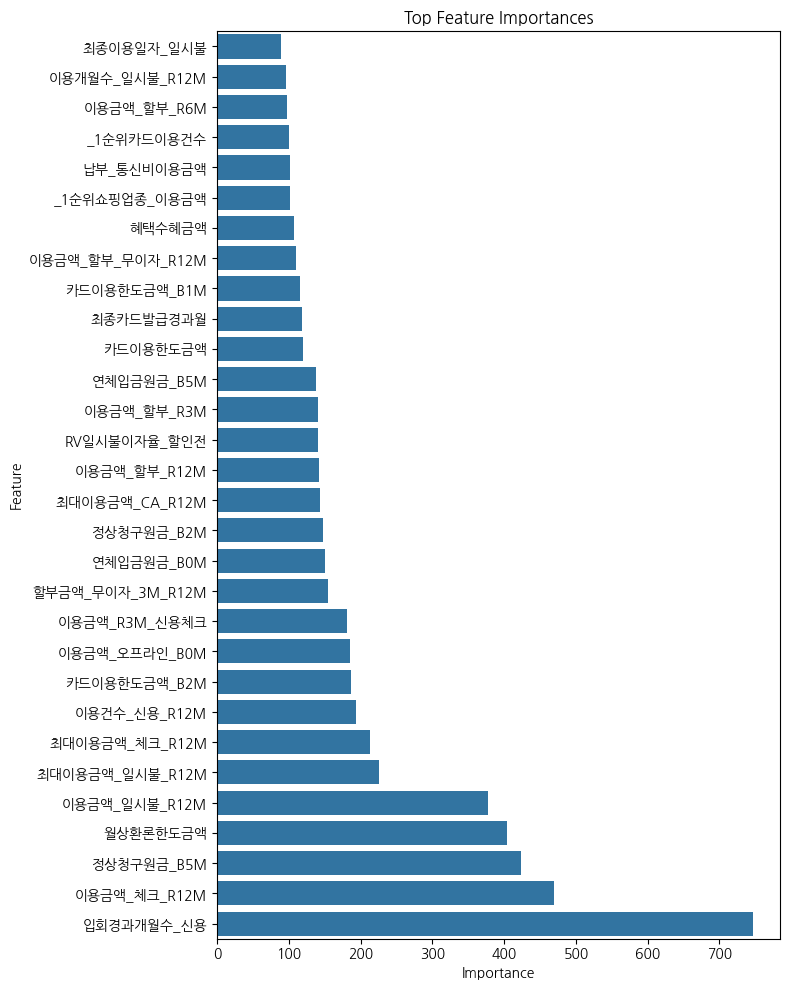

In [ ]:
# Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
model, score = train_model_with_keywords(X_selected, y)
print(f"Macro F1 score: {score:.4f}")
plot_feature_importance(model, X_selected.columns)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9611
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 40
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

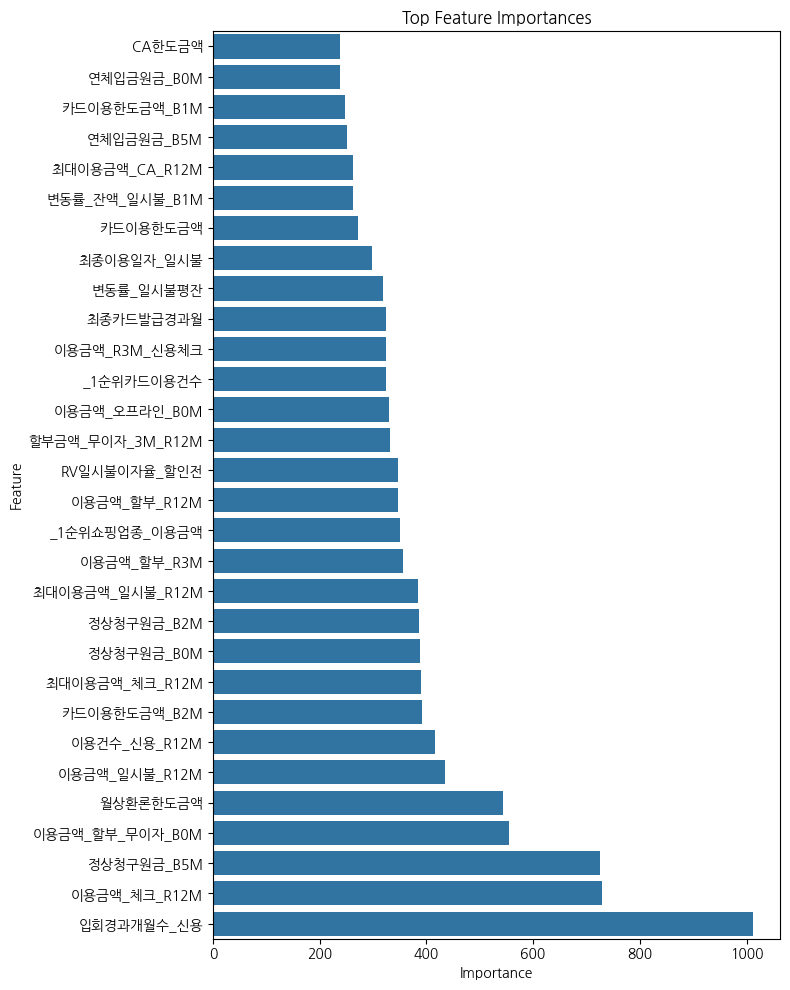

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14468
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 60
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

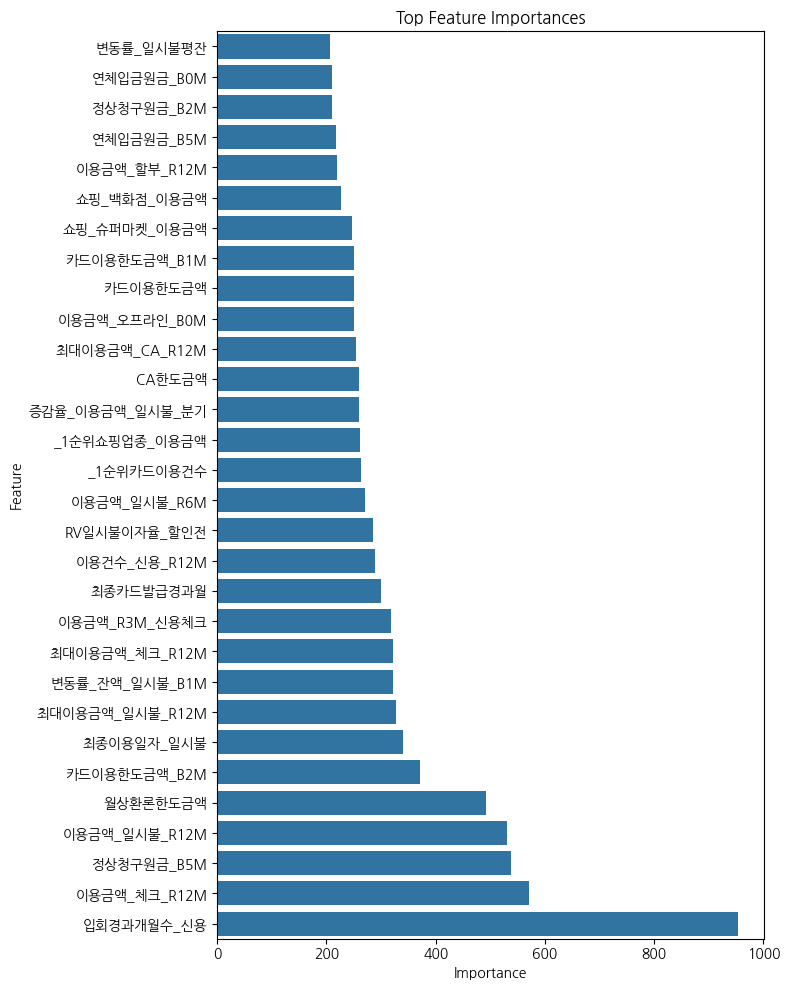

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18911
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 80
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

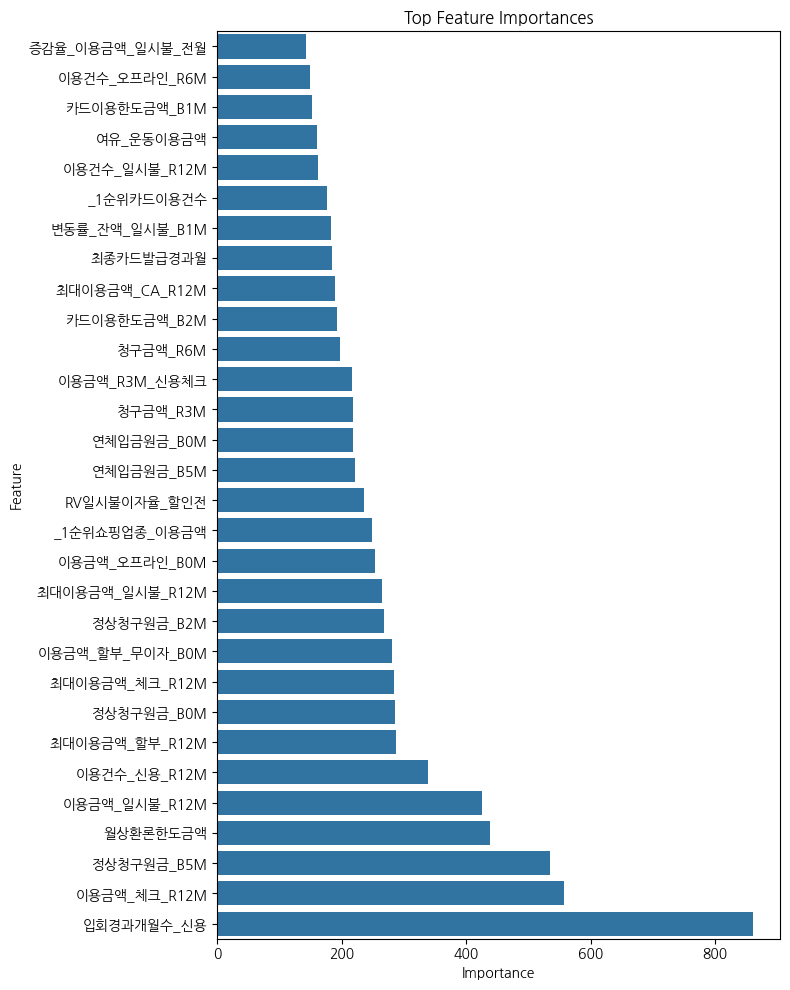

In [ ]:
# Ï§ëÏöîÎèÑ Í∏∞Î∞ò ÌîºÏ≤ò ÏÑ†ÌÉù Î∞è Ï∂îÍ∞Ä Ïã§Ìóò (40, 60, 80Í∞ú ÌîºÏ≤ò)
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

for top_n in [40, 60, 80]:
    top_features = X_selected.columns[sorted_idx[:top_n]]
    model_sub, score_sub = train_model_with_keywords(X_selected[top_features], y)
    print(f"Top {top_n} features ‚Üí F1 Score: {score_sub:.4f}")
    plot_feature_importance(model_sub, top_features)

In [ ]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

# ÏÉÅÏúÑ 60Í∞ú ÌîºÏ≤òÎßå ÏÑ†ÌÉù
top_n = 60
top_features = X_selected.columns[sorted_idx[:top_n]]

print(f"\nüìå Ï§ëÏöîÎèÑ ÏÉÅÏúÑ {top_n}Í∞ú ÌîºÏ≤ò Î™©Î°ù (ÌïúÍ∏ÄÎßå Ï∂úÎ†•):")
for feature in top_features:
    # ÌïúÍ∏ÄÏù¥ Ìè¨Ìï®Îêú Ïó¥ Ïù¥Î¶ÑÎßå Ï∂úÎ†•
    if any('\uac00' <= ch <= '\ud7a3' for ch in feature):
        print(feature)


üìå Ï§ëÏöîÎèÑ ÏÉÅÏúÑ 60Í∞ú ÌîºÏ≤ò Î™©Î°ù (ÌïúÍ∏ÄÎßå Ï∂úÎ†•):
Ï≤≠Íµ¨ÏÑúÏàòÎ†πÎ∞©Î≤ï
Ìè¨Ïù∏Ìä∏_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R12M
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî
ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M
Ìè¨Ïù∏Ìä∏_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R3M
Ï≤≠Íµ¨Í∏àÏï°_B0
ÎåÄÌëúÏ≤≠Íµ¨ÏÑúÏàòÎ†πÏßÄÍµ¨Î∂ÑÏΩîÎìú
ÎåÄÌëúÏ≤≠Íµ¨ÏßÄÍ≥†Í∞ùÏ£ºÏÜåÍµ¨Î∂ÑÏΩîÎìú
Ìï†Ïù∏Í∏àÏï°_B0M
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî
Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R3M
Ï≤≠Íµ¨Í∏àÏï°_R3M
Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_B0
Ï≤≠Íµ¨ÏÑúÎ∞úÏÜ°Ïó¨Î∂Ä_R6M
Ìï†Ïù∏Í∏àÏï°_Ï≤≠Íµ¨ÏÑú_R3M
Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M
Ïó∞Ï≤¥Í±¥Ïàò_R3M
ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°
Ï≤≠Íµ¨Í∏àÏï°_R6M
Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M
Ìï†Ïù∏Í∏àÏï°_R3M
Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M
ÎßàÏùº_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R3M
Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Î∂ÑÍ∏∞
ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä
RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ
ÌòúÌÉùÏàòÌòúÍ∏àÏï°
Ìï†Ïù∏Í∏àÏï°_Ï≤≠Íµ¨ÏÑú_B0M
Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞
Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî
ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M
ÌòúÌÉùÏàòÌòúÍ∏àÏï°_R3M
Î

In [193]:
from itertools import product
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_df = pd.read_csv(train_path)
y_train = train_df['Segment']

In [252]:
recommended_columns = [
    "ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú", "Ïó∞Î†π", "Life_Stage","ÌöåÏõêÏó¨Î∂Ä_Ïó∞Ï≤¥",
    "Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_R12M","ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©","ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°","Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°","Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Ï†ÑÏõî","Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M",
    "Ìè¨Ïù∏Ìä∏_Ïù¥Ïö©Ìè¨Ïù∏Ìä∏_R12M","Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_R12M","Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_R12M","Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨","Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_R12M",
    "Î∂àÎßåÏ†úÍ∏∞ÌõÑÍ≤ΩÍ≥ºÏõî_R12M","RPÌõÑÍ≤ΩÍ≥ºÏõî","_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°","Ìè¨Ïù∏Ìä∏_Ï†ÅÎ¶ΩÌè¨Ïù∏Ìä∏_R12M",
    "_1ÏàúÏúÑÏóÖÏ¢Ö", "_1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö", "_1ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö","_1ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í±¥Ïàò","ÏõîÏ§ëÌèâÏûî",
     "_2ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°", "_2ÏàúÏúÑÏóÖÏ¢Ö","_2ÏàúÏúÑÏπ¥ÎìúÏù¥Ïö©Í∏àÏï°","_2ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö","_2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö",
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Î∂ÑÍ∏∞","CAÌïúÎèÑÍ∏àÏï°","Î≥ÄÎèôÎ•†_ÏùºÏãúÎ∂àÌèâÏûî","Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M","ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°","Î≥ÄÎèôÎ•†_Ìï†Î∂ÄÌèâÏûî","ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°","Ïπ¥ÎìúÎ°†Ïù¥Ïö©Í±¥Ïàò_ÎàÑÏ†Å","Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_R12M","Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B5M","Ïù¥Ïö©Í∞úÏõîÏàò_Ï≤¥ÌÅ¨_R12M","Ïó∞Ï≤¥ÏûÖÍ∏àÏõêÍ∏à_B5M","Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B5M","Ïù¥Ïö©Í∞úÏõîÏàò_Ìï†Î∂Ä_R12M","ÏµúÏ¥àÏπ¥ÎìúÎ°†Ïù¥Ïö©Í≤ΩÍ≥ºÏõî"
]

In [253]:
X = train_df[recommended_columns]

In [254]:
#objectÏù∏ Ïª¨ÎüºÎßå ÎßåÎìúÎäî Î¶¨Ïä§Ìä∏ Ïª¥ÌîÑÎ¶¨Ìï∏ÏÖò
oj_columns = [x for x in X.columns if X[x].dtype == "object"]
oj_columns

['Ïó∞Î†π',
 'Life_Stage',
 '_1ÏàúÏúÑÏóÖÏ¢Ö',
 '_1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö',
 '_1ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö',
 '_2ÏàúÏúÑÏóÖÏ¢Ö',
 '_2ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö',
 '_2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö']

In [255]:
from sklearn.preprocessing import LabelEncoder

#Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocessing(df):
    oj_columns = [x for x in df.columns if df[x].dtype == "object"]
    for cate in oj_columns:
        df[cate] = df[cate].fillna("missing")  # NaN Ï≤òÎ¶¨ Î®ºÏ†Ä
        le = LabelEncoder()
        df[cate] = le.fit_transform(df[cate])

    return df

In [256]:
#XÎ•º Ï†ÑÏ≤òÎ¶¨ ÌïúÎã§
x_train = preprocessing(X)
x_train

<ipython-input-255-0893276ea463>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = df[cate].fillna("missing")  # NaN Ï≤òÎ¶¨ Î®ºÏ†Ä
<ipython-input-255-0893276ea463>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = le.fit_transform(df[cate])
<ipython-input-255-0893276ea463>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú  Ïó∞Î†π  Life_Stage  ÌöåÏõêÏó¨Î∂Ä_Ïó∞Ï≤¥  Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_R12M  ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©  ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  \
0           2   4           1        0             0          39    180503   
1           1   1           0        0             0          39         0   
2           2   3           5        0             0         172    206098   
3           2   4           1        0         24373         202    206308   
4           2   1           4        0         15966           3     93789   
...       ...  ..         ...      ...           ...         ...       ...   
70555       1   2           4        0          3982          11    151553   
70556       1   3           5        0             0         278         0   
70557       2   4           3        0         28782         191    205060   
70558       2   3           3        0             0         105    160705   
70559       1   4           1        0             0         222    205946   

       Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Ï†ÑÏõî  Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M  ...  Î≥ÄÎèôÎ•†_Ìï†Î∂ÄÌèâÏûî  ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  \
0        100009        0.000000           8166  ...  0.999998         0   
1         41180        0.000000          41278  ...  0.999998         6   
2         40798        0.000000           2979  ...  0.999998         6   
3         29999        0.000000          37780  ...  1.053473         5   
4         18989        0.002695           2248  ...  0.905738         4   
...         ...             ...            ...  ...       ...       ...   
70555     30003        0.000000          22659  ...  0.999998         5   
70556     52017        0.000000          25655  ...  0.999998         0   
70557     41444        0.000000          27394  ...  1.051218         5   
70558     50371        0.000000            952  ...  0.999998         9   
70559     29989        0.000000          70107  ...  0.901147         5   

       Ïπ¥ÎìúÎ°†Ïù¥Ïö©Í±¥Ïàò_ÎàÑÏ†Å  Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_R12M  Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B5M  Ïù¥Ïö©Í∞úÏõîÏàò_Ï≤¥ÌÅ¨_R12M  Ïó∞Ï≤¥ÏûÖÍ∏àÏõêÍ∏à_B5M  \
0               0             0        1044              0         474   
1               0             0        5606              0        2479   
2               0             0           0              0           0   
3               0             9        6425              0         805   
4               0             0        1294             12           0   
...           ...           ...         ...            ...         ...   
70555           0             4        2388              0         931   
70556           2             0       24381              0       13383   
70557           1            11       10053              0        4418   
70558           0             0        1719              0        1719   
70559           0             0        7246              0           0   

       Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B5M  Ïù¥Ïö©Í∞úÏõîÏàò_Ìï†Î∂Ä_R12M  ÏµúÏ¥àÏπ¥ÎìúÎ°†Ïù¥Ïö©Í≤ΩÍ≥ºÏõî  
0             569              0         999  
1            3127              0         999  
2               0              0         999  
3            5619              8         999  
4            1294              2         999  
...           ...            ...         ...  
70555        1457              2         999  
70556       10997              0          96  
70557        5635              8          19  
70558           0              0         999  
70559        7246              0         999  

[70560 rows x 44 columns]

In [257]:
#Î™®Îç∏ ÌïôÏäµ Î∞è ÏïôÏÉÅÎ∏î ÏòàÏ∏°
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Î≥ÄÏàò Ïû¨Ï†ïÏùò
X = x_train
y = y_train

In [233]:
#ÎùºÎ≤® Ïù∏ÏΩî
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [234]:
#Î∂àÍ∑†Ìòï ÌôïÏù∏

y = pd.Series(y)

print(y.value_counts())
print(y.value_counts(normalize=True))

4    45204
3     8216
2     3003
0       22
1        3
Name: count, dtype: int64
4    0.800808
3    0.145550
2    0.053199
0    0.000390
1    0.000053
Name: proportion, dtype: float64


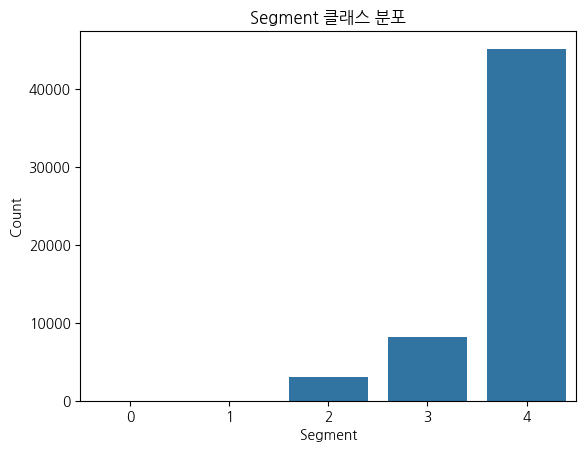

In [235]:
#Segment ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò ÏãúÍ∞ÅÌôî ÌôïÏù∏
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Segment ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

In [218]:
#SMOTE + RandomOverSampler Ï°∞Ìï©

from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import pandas as pd

# 1. SMOTEÎ°ú ÌÅ¥ÎûòÏä§ 2, 3 Î≥¥ÏôÑ
smote = SMOTE(
    sampling_strategy={2: 40000, 3: 45000},  # ÏõêÌïòÎäî ÏàòÏπòÎ°ú Ï¶ùÍ∞ï
    random_state=42
)
X_sm, y_sm = smote.fit_resample(X, y)

# 2. RandomOverSamplerÎ°ú ÌÅ¥ÎûòÏä§ 0, 1 Î≥µÏ†ú
ros = RandomOverSampler(
    sampling_strategy={0: 35000, 1: 30000},  # ÏµúÏÜå 1,000Í∞úÎ°ú ÎßûÏ∂§
    random_state=42
)
X_resampled, y_resampled = ros.fit_resample(X_sm, y_sm)

# ÌôïÏù∏
print("ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:")
print(pd.Series(y_resampled).value_counts())

ValueError: Found input variables with inconsistent numbers of samples: [70560, 56448]

In [205]:
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è ÏïôÏÉÅÎ∏î

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np

In [206]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [207]:
# F1 scorer Ï†ïÏùò
f1_macro = make_scorer(f1_score, average='macro')

In [208]:
#  XGBoost ÌäúÎãù adelante ÏïÑÎç∏ÎûÄÌÖå Î≠îÍ∞Ä Ïù¥Î¶ÑÏù¥ÎÇò Í∑∏Îü∞Í±∞ Í∞ôÏùÄÎç∞
param_xgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_xgb, scoring=f1_macro, cv=3, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

#  LightGBM ÌäúÎãù
param_lgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
lgb = LGBMClassifier(random_state=42)
grid_lgb = GridSearchCV(lgb, param_lgb, scoring=f1_macro, cv=3, n_jobs=-1)
grid_lgb.fit(X_train, y_train)
best_lgb = grid_lgb.best_estimator_

#  CatBoost Í∏∞Î≥∏ (ÌäúÎãùÏùÄ ÏÑ†ÌÉù)
cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat.fit(X_train, y_train)

#  soft voting ÏòàÏ∏°
xgb_proba = best_xgb.predict_proba(X_val)
lgb_proba = best_lgb.predict_proba(X_val)
cat_proba = cat.predict_proba(X_val)

ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3
ensemble_pred = np.argmax(ensemble_proba, axis=1)  # Í∞ÄÏû• ÌÅ∞ Í∞í Î∞òÌôò

#  ÌèâÍ∞Ä
print("F1 Score (macro):", f1_score(y_val, ensemble_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_val, ensemble_pred, average='weighted'))
print("\nüìä Classification Report:")
print(classification_report(y_val, ensemble_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:36:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9917
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 64
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
